In [2]:
import os
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

import ot
from ot.bregman import (barycenter, barycenter_debiased,
                        convolutional_barycenter2d,
                        convolutional_barycenter2d_debiased)
from tqdm.notebook import tqdm

import torch
from Barycenter_fixed import barycenter_debiased_1d, IBP_1d, barycenter_product_1d

In [3]:
import warnings

In [4]:
def gen1D_gaussian(x, m, s):
    p = (1/(np.sqrt(2*np.pi*s**2))) * np.exp(-(x-m)**2 / (2*s**2))
    return p

In [5]:
n_features = 1000


m1 = -3
s1 = 0.4
m2 = 3
s2 = 0.4

grid = np.linspace(-5,5,n_features)


# Gaussian distributions
p1 = gen1D_gaussian(grid, m1, s1)  # m= mean, s= std
p2 = gen1D_gaussian(grid, m2, s2)


# creating matrix A containing all distributions
P = np.vstack((p1, p2)).T
n_distributions = P.shape[1]

# loss matrix + normalization
M = (grid[:, None] - grid[None, :])**2
# M = M / M.max()

In [6]:
t = 0.5
weights = np.array([1-t,t])
epsilons = np.array([50, 100, 250]) / n_features

bars_debiased = []
bars_IBP = []
bars_product = []
for reg in epsilons:
    bar_debiased = barycenter_debiased_1d(P, M, reg, maxiter=5000, tol=1e-5, weights=None)
    bars_debiased.append(bar_debiased)

    bar_IBP = IBP_1d(P, M, reg, maxiter=5000, tol=1e-5, weights=None)
    bars_IBP.append(bar_IBP)

    bar_product = barycenter_product_1d(P, M, reg, maxiter=500, tol=1e-5, weights=None)
    bars_product.append(bar_product)

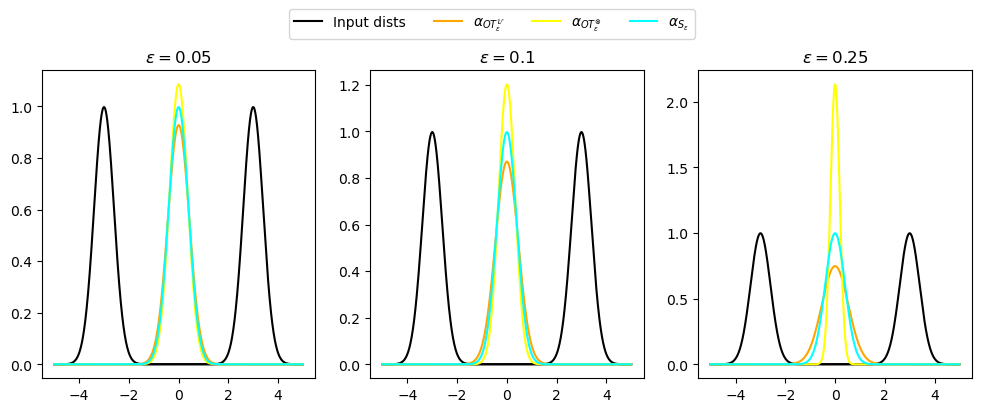

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# For collecting all the labels and handles
handles, labels = [], []

for i in range(len(epsilons)):
    axs[i].plot(grid, p1, color='black', label='Input dists')
    axs[i].plot(grid, p2, color='black')
    axs[i].plot(grid, bars_IBP[i], color='orange', label=r"$\alpha_{OT_{\varepsilon}^{\mathcal{U}}}$")
    axs[i].plot(grid, bars_product[i], color='yellow', label=r'$\alpha_{OT_{\varepsilon}^{\otimes}}$')
    axs[i].plot(grid, bars_debiased[i], color='cyan', label=r'$\alpha_{S_\varepsilon}$')
    
    # For the first subplot, collect the handles and labels
    if i == 0:
        h, l = axs[i].get_legend_handles_labels()
        handles.extend(h)
        labels.extend(l)

    axs[i].set_title(r'$\varepsilon= {}$'.format(epsilons[i]))

# Add the legend above the subplots
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=len(labels))
plt.show()


In [8]:
q = barycenter_debiased_1d(P, M, reg, maxiter=5000, tol=1e-5, weights=None)

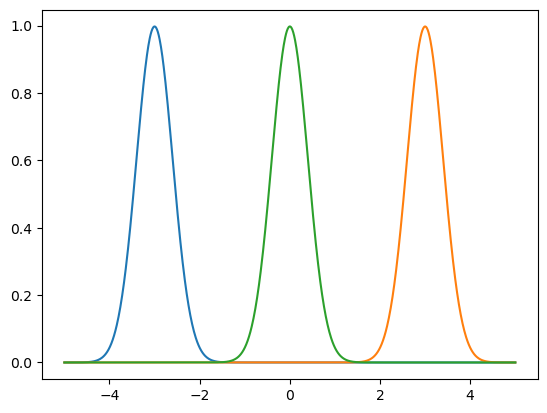

In [9]:
plt.plot(grid,p1)
plt.plot(grid,p2)
plt.plot(grid,q)

In [10]:
imgs = torch.tensor([[[[1.0, 2.0],
                       [3.0, 4.0]]]])

print(imgs.shape)

torch.Size([1, 1, 2, 2])


In [11]:
np.array([[1,2],[3,4]]).shape

(2, 2)